In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys

from src import q2, FER_train, FER_predict
from src.utils.file_helper import get_config

# globals
CONFIG_FILE = "config.toml"
# Load the configuration file
CONFIG = get_config(CONFIG_FILE)

output_dir = Path().resolve() / CONFIG["dir"]["output"]

Config file: /mnt/d/StFX/OneDrive - St. Francis Xavier University/CSCI 444/project/config.toml loaded!


In [12]:
li = []

for filename in output_dir.glob("*.log"):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

keys=["wo_batchnorm", "with_batchnorm", "with_batchnorm_dropout", "final_model"]

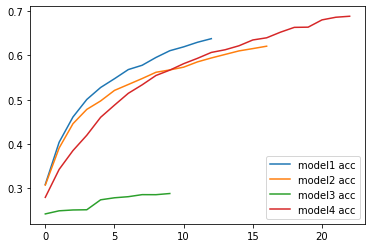

In [31]:
for idx, a in enumerate(li):
    plt.plot(a.epoch, a.accuracy, label=f"model{idx+1} acc")
    plt.plot(a.epoch, a.val_accuracy, label=f"model{idx+1} val_acc")
    plt.legend()

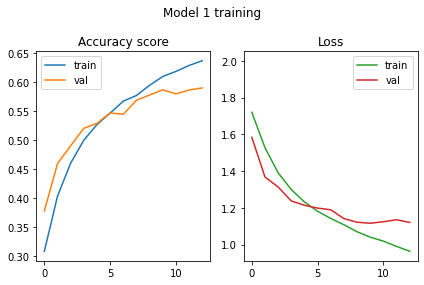

In [48]:
a=li[0]

fig, ax = plt.subplots(1, 2)
ax = ax.ravel()

ax[0].plot(a.epoch, a.accuracy, label=f"train")
ax[0].plot(a.epoch, a.val_accuracy, label=f"val")
ax[0].set_title("Accuracy score")
ax[0].legend()
ax[1].plot(1, 2, 2)
ax[1].plot(a.epoch, a.loss, label=f"train")
ax[1].plot(a.epoch, a.val_loss, label=f"val")
ax[1].set_title("Loss")
ax[1].legend()
fig.suptitle("Model 1 training")
plt.tight_layout()